Import des librairies

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
sklearn.__version__

'1.1.2'

Import des données d'Iris.csv

In [3]:
data = pd.read_csv("DATA/iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Séparation du jeux de données en jeux d'entrainement et de test

In [5]:
Dtrain, Dtest = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
Dtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 22 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  120 non-null    float64
 1   sepal.width   120 non-null    float64
 2   petal.length  120 non-null    float64
 3   petal.width   120 non-null    float64
 4   variety       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [7]:
Dtrain.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
22,4.6,3.6,1.0,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
65,6.7,3.1,4.4,1.4,Versicolor
11,4.8,3.4,1.6,0.2,Setosa
42,4.4,3.2,1.3,0.2,Setosa


Isolement des données explicatives et la variable cible

In [8]:
XTrain = Dtrain.drop("variety", axis=1)
yTrain = Dtrain["variety"]

In [9]:
yTrain.value_counts()

Versicolor    41
Setosa        40
Virginica     39
Name: variety, dtype: int64

Instanciation de l'arbre de décision avec les paramètres par défaut

In [10]:
from sklearn.tree import DecisionTreeClassifier
arbre_1 = DecisionTreeClassifier(random_state=0)


Affichage des valeurs des hyperparamètres

In [11]:
arbre_1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [12]:
arbre_1.fit(XTrain, yTrain)

DecisionTreeClassifier(random_state=0)

Affichage "graphique" de l'arbre

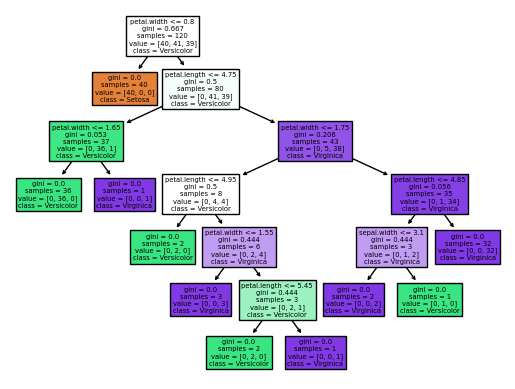

In [13]:
from sklearn.tree import plot_tree
plot_tree(arbre_1, feature_names=list(XTrain.columns), class_names=yTrain.unique(), filled=True);

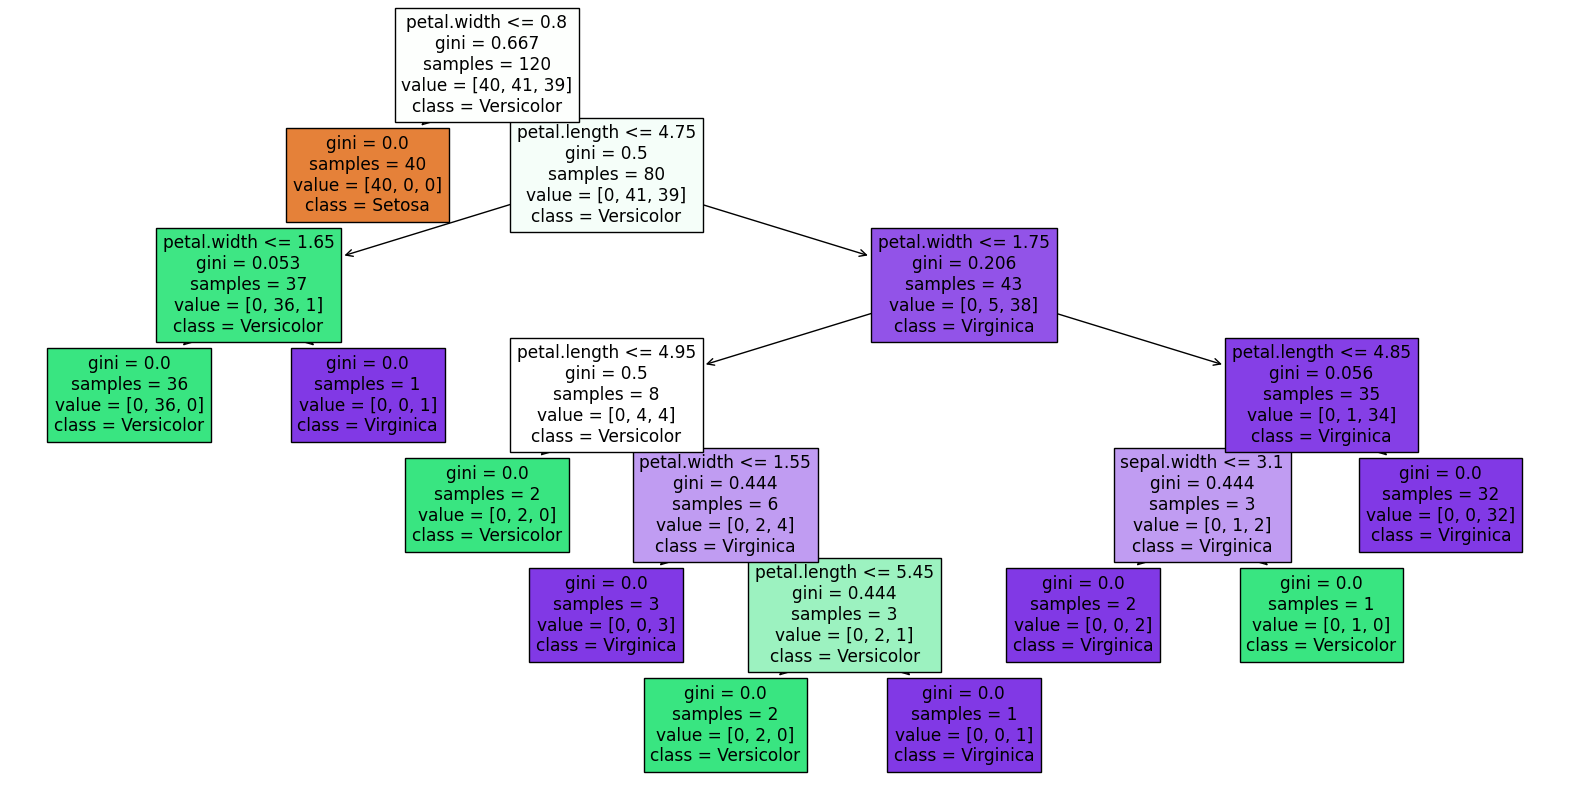

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(arbre_1, feature_names=list(XTrain.columns), class_names=yTrain.unique(), filled=True)
plt.show()

Affichage texte sous forme de règles

In [15]:
from sklearn.tree import export_text
print(export_text(arbre_1, feature_names=list(XTrain.columns), show_weights=True))

|--- petal.width <= 0.80
|   |--- weights: [40.00, 0.00, 0.00] class: Setosa
|--- petal.width >  0.80
|   |--- petal.length <= 4.75
|   |   |--- petal.width <= 1.65
|   |   |   |--- weights: [0.00, 36.00, 0.00] class: Versicolor
|   |   |--- petal.width >  1.65
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: Virginica
|   |--- petal.length >  4.75
|   |   |--- petal.width <= 1.75
|   |   |   |--- petal.length <= 4.95
|   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: Versicolor
|   |   |   |--- petal.length >  4.95
|   |   |   |   |--- petal.width <= 1.55
|   |   |   |   |   |--- weights: [0.00, 0.00, 3.00] class: Virginica
|   |   |   |   |--- petal.width >  1.55
|   |   |   |   |   |--- petal.length <= 5.45
|   |   |   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: Versicolor
|   |   |   |   |   |--- petal.length >  5.45
|   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: Virginica
|   |   |--- petal.width >  1.75
|   |   |   |--- petal.length <= 4.85
|   | 

In [16]:
pd.DataFrame(arbre_1.feature_importances_, index=XTrain.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

,Importance
petal.width,0.577395
petal.length,0.405935
sepal.width,0.016670
sepal.length,0.000000


Import de l'échantillon de test

In [17]:
Dtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 73 to 30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  30 non-null     float64
 1   sepal.width   30 non-null     float64
 2   petal.length  30 non-null     float64
 3   petal.width   30 non-null     float64
 4   variety       30 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


In [18]:
XTest = Dtest.drop("variety", axis=1)
yTest = Dtest["variety"]

In [19]:
yTest.value_counts()

Virginica     11
Setosa        10
Versicolor     9
Name: variety, dtype: int64

Prédiction sur l'échantillon de test

In [20]:
pred_1 = arbre_1.predict(XTest)

In [21]:
import numpy as np

In [22]:
np.unique(pred_1, return_counts=True)

(array(['Setosa', 'Versicolor', 'Virginica'], dtype=object),
 array([10,  9, 11]))

Matrice de confusion

In [23]:
from sklearn import metrics
mc = metrics.confusion_matrix(yTest, pred_1)
mc

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

type interne de mc

In [24]:
type(mc)

numpy.ndarray

accuracy

In [25]:
acc = np.sum(np.diag(mc)) / np.sum(mc)
acc

1.0

Avec l'outil de Sklearn

In [26]:
print(metrics.accuracy_score(yTest, pred_1))

1.0


Tauc d'erreur

In [27]:
err = 1.0 - acc
err

0.0

Rappel par classe 

In [28]:
print(np.diag(mc)/np.sum(mc, axis=1))

[1. 1. 1.]


Rappel par classe avec metriccs

In [29]:
print(metrics.recall_score(yTest, pred_1, average=None))

[1. 1. 1.]


Précision par classe

In [30]:
print(np.diag(mc)/np.sum(mc, axis=0))

[1. 1. 1.]


Précision par classe avec metrics

In [31]:
print(metrics.precision_score(yTest, pred_1, average=None))

[1. 1. 1.]


Rapport complet avec l'outil Sklearn

In [32]:
print(metrics.classification_report(yTest, pred_1))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

